# DSC180b Capstone Project

## Importing Packages

In [1]:
import json
import os

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch as t
import sklearn
import skmultilearn

# import biom
# from qiime2.plugins import feature_table
# from qiime2 import Artifact
# from qiime2.plugins.metadata.methods import distance_matrix


## Loading Data

In [17]:
## Obtaining file paths
with open("config/data-params.json") as fh:
    file_paths = json.load(fh)

In [79]:
feature_table = pd.read_csv('~/private/dsc180b-data/feature_table.csv').set_index('Unnamed: 0')
metadata = pd.read_csv('~/private/dsc180b-data/11666_metadata.txt', sep='\t', index_col=0)

/tmp/ipykernel_6243/1782694761.py:2: DtypeWarning: Columns (1,2,3,4,6,7,8,10,11,12,13,14,17,18,19,20,25,26,27,29,30,31,32,33,34,35,36,37,38,40,41,42,43,44,45,46,55,56,57,61,62,63,64,65,66,67,69,70,71,72,73,75,76,78,80,82,83,84,85,86,87,88,89,90,91,92,95,98,99,102,103,104,105,106,107,108,109,111,119,121,122,123,124,125,126,127,128,129,130,131,132,133,134,136,138,139,141,142,143,144,145,146,147,148,152,153,155,156,157,160,164,165,168,169,170,172,173,174,175) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata = pd.read_csv('~/private/dsc180b-data/11666_metadata.txt', sep='\t', index_col=0)


In [80]:
feature_table.head()

,AACATAAGGGGCAAGCGTTGTCCGGAATCACTGGGCGTAAAGGGCGCGTAGGTGGTCTGTTAAGTCAGATGTGAAATGTAAGGGCTCAACCCTTAACGTGCATCTGATACTGGCAGACTTGAGTGCGGAAGAGGCAAGTGGAATTCCTAG,AACATAGGGGGCAAGCGTTGCCCGGAATCACTGGGCGTAAAGGGCGCGTAGGTGGTCTGTTAAGTCAGATGTGAAATGTAAGGGCTCAACCCTTAACGTGCATCTGATACTGGCAGACTTGAGTGCGGAAGAGGCAAGTGGAATTCCTAG,AACATAGGGGGCAAGCGTTGTCCGGAAACACTGGGCGTAAAGGGCGCGTAGGCGGTCTGTTAAGTCGGATGTGAAATGTAAGGGCTCAACCCTTAACGTGCATCTGATACTGGCAGACTTGAGTGCGGAAGAGGCAAGTGGAATTCCTAG,AACATAGGGGGCAAGCGTTGTCCGGAATCACTGGGCATAAAGGGCGCGTAGGTGGTTTGTTAAGTCAGATGTGAAATGTAGGGGCTCAACCCCTAACGTGCATCTGATACTGGCAGACTTGAGTGCGGAAGAGGCAAGTGGAATTCCTAG,AACATAGGGGGCAAGCGTTGTCCGGAATCACTGGGCGTAAAGAGCGCGTAGGTGGTCTGTTAAGTCAGATGTGAAATGTAAGGGCTCAACCCTTAACGTGCATCTGATACTGGCAGACTTGAGTGCGGAAGAGGCAAGTGGAATTCCTAG,AACATAGGGGGCAAGCGTTGTCCGGAATCACTGGGCGTAAAGGGCGCGCAGGCGGTCTGTTAAGTCAGATGTGAAAGGTTAGGGCTCAACCCTGAACGTGCATCTGATACTGGCAGACTTGAGTATGGAAGAGGTAAGTGGAATTCCTAG,AACATAGGGGGCAAGCGTTGTCCGGAATCACTGGGCGTAAAGGGCGCGTAGGCAGTTTGTTAAGTCGGATGTGAAATGTAAGGGCTCAACCCTTAACGTGCATCTGATACTGGCAGACTTGAGTGCGGAAGAGGCAAGTGGAATTCCTAG,AACATAGGGGGCAAGCGTTGTCCGGAATCACTGGGCGTAAAGGGCGCGTAGGCGGCCTGTTAAGTCGGATGTGAAATGTAAGGGCTCAACCCTTAACGTGCATCTGATACTGGCAGACTTGAGTGCGGAAGAGGCAAGTGGAATTCCTAG,AACATAGGGGGCAAGCGTTGTCCGGAATCACTGGGCGTAAAGGGCGCGTAGGCGGTCTGTTAAGTCAGATGTGAAATGTAAGGGCTCAACCCTTAACGTGCATCTGATACTGGCAGACTTGAGTGCGGAAGAGGCAAGTGGAATTCCTAG,AACATAGGGGGCAAGCGTTGTCCGGAATCACTGGGCGTAAAGGGCGCGTAGGCGGTCTGTTAAGTCGGATGTGAAATGTAAGGGCTCAACCCTTAACGTGCATCCGATACTGGCAGACTTGAGTGCGGAAGAGGCAAGTGGAATTCCTAG,...,TTCGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGATCGTAGACGGCGAGACAAGTCTGAAGTGAAAGCCCGGGGCTCAACCCCGGGACTGCTTTGGAAACTGCCTTGCTAGAGTGCTGGAGAGGTAAGTGGAATTCCTAG,TTCGTAGGGGGCAAGCGTTGTCCGGAATGACTGGGCGTAAAGGGCGTGTAGGCGGCCTGATAAGTATGAAGTGAAAGTCCTGCTTTCAAGGTGGGAATTGCTTTGTAGACTGTCGGGCTTGAGTGCGGAAGAGGTAAGTGGAATTCCCAG,TTCGTAGGGGGCAAGCGTTGTCCGGAATGATTGGGCGTAAAGGGCGCGTAGGCGGCCTGCTAAGTCTGGAGTGAAAGTCCTGCTTTCAAGGTGGGAATTGCTTTGGATACTGGTGGGCTGGAGTGCAGGAGAGGAAAGCGGAATTACCGG,TTCGTAGGGGGCGAGCGTTATCCGGATTTATTGGGCGTAAAGCGTGCGTAGGCGGTTTATTAAGTCTAGAATTAAAGCCCGAGGCTTAACCTCGGTTCGTTCTAGATACTGGTTGACTAGAGTACAGTAGAGGCAAATGGAATTCCTAGT,TTCGTAGGTGGCAAGCGTTGTCCGGATTTACTGGGTGTAAAGGGCGTGTAGGCGGAGCAGCAAGTCAGAAGTGAAATCTCTGGGCTCAACCCAGAAACTGCTTTTGAAACTGTTGCCCTTGAGTATCGGAGAGGCAGGCGGAATTCCTAG,TTCGTAGGTGGCAAGCGTTGTCCGGATTTACTGGGTGTAAAGGGCGTGTAGGCGGGACGGCAAGTCAGGCGTGAAAACCATGGGCTCAACCCATGGCCTGCGTTTGAAACTGTTGTTCTTGAGTACTGGAGAGGTTGGCGGAATTCCTAG,TTCGTAGGTGGCGAGCGTTATCCGGATTTACTGGGTGTAAAGGGCGCGTAGGCGGGAATGCAAGTCAGATGTGAAATCCAGGGGCTTAACTCTTGAACTGCATTTGAAACTGTATTTCTTGAGTGTCGGAGAGGTTGACGGAATTCCTAG,TTCGTAGGTGGCGAGCGTTGTCCGGAATGACTGGGCGTAAAGGGAGCGTAGGCGGCACAACAAGTTAGGAGTGAAATACCGTGGCTTAACCACGGAACTGCTTTTAAAACTGTTGAGCTAGAGTGATGGAGAGGAAAGCGGAATTCCTAG,TTCGTATGGAGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGTGCGTAGGTGGCAGTGCAAGTCAGATGTGAAAGGCCGGGGCTCAACCCCGGAGCTGCATTTGAAACTGCATAGCTAGAGTACAGGAGAGGCAGGCGGAATTCCTAG,TTCGTATGGTGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGCTGTGTAAGTCTGAAGTGAAAGCCCGGGGCTCAACCCCGGGACTGCTTTGGAAACTATGCAGCTAGAGTGTCGGAGAGGTAAGTGGAATTCCCAG
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
11666.BLANK7.7B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11666.BLANK5.5B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11666.G0341A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11666.BLANK3.3A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11666.BLANK5.5E,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
metadata.head()

,abdominal_obesity_idf_v2,abdominal_obesity_ncep_v2,ac_ratio_gt30,ac_ratio_gt30_v2,age_units,age_v2,agegroup_c6_nhanes_v2,agegroup_c6_v2,anonymized_name,antibiotic,...,taxon_id,title,type_stool,us_born_v2,weight_norm_overall_v2,weight_units,yes_no,yogurt,yrs_btwn_viv2,yrsus_c2_v2
sample_name,,,,,,,,,,,,,,,,,,,,,
11666.BLANK1.1A,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,BLANK1.1A,not applicable,...,256318.0,GOLD study,not applicable,not applicable,not applicable,not applicable,NaN,not applicable,not applicable,not applicable
11666.BLANK1.1A.ITS,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,BLANK1.1A.ITS,not applicable,...,256318.0,GOLD study,not applicable,not applicable,not applicable,not applicable,NaN,not applicable,not applicable,not applicable
11666.BLANK1.1B,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,BLANK1.1B,not applicable,...,256318.0,GOLD study,not applicable,not applicable,not applicable,not applicable,NaN,not applicable,not applicable,not applicable
11666.BLANK1.1B.ITS,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,BLANK1.1B.ITS,not applicable,...,256318.0,GOLD study,not applicable,not applicable,not applicable,not applicable,NaN,not applicable,not applicable,not applicable
11666.BLANK1.1C,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,BLANK1.1C,not applicable,...,256318.0,GOLD study,not applicable,not applicable,not applicable,not applicable,NaN,not applicable,not applicable,not applicable


## Cleaning Metadata

Subset metadata based on existing samples in feature table

In [83]:
metadata = metadata.loc[feature_table.index]

Keep relevant diseases (classes) and features in metadata

In [84]:
diseases = {
    'abdominal_obesity_ncep_v2': 'obesity',
    'diabetes2_v2': 'diabetes',
    'dyslipidemia_v2': 'dyslipidemia',
    'hypertension2_v2': 'hypertension',
    'ckd2': 'ckd',
    'precvd': 'precvd',
    'elevated_bp_selfmeds_v2': 'elevated_bp',
}
           
other_features = {
    'age_v2': 'age',
    'center': 'center',
    'gender': 'gender',
    'host_body_mass_index': 'BMI'
}

subset_cols = diseases | other_features

##DROP NA IN THE FUTURE
disease_metadata = metadata[diseases.keys()].rename(columns=diseases).fillna(0) #only diseases
metadata = metadata[subset_cols.keys()].rename(columns=subset_cols).fillna(0)


disease_metadata

,obesity,diabetes,dyslipidemia,hypertension,ckd,precvd,elevated_bp
Unnamed: 0,,,,,,,
11666.BLANK7.7B,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable
11666.BLANK5.5B,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable
11666.G0341A,1,3,0,1,0,0,1
11666.BLANK3.3A,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable
11666.BLANK5.5E,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable
...,...,...,...,...,...,...,...
11666.G1518B,1,3,0,1,0,0,1
11666.G1501A,0,3,1,1,1,0,1
11666.G1685A,1,2,0,0,0,0,0


Map values in each class to binary. 1 in a column means a sample contains the corresponding disease, and 0 means it does not.

In [85]:
for col in disease_metadata:
    print(disease_metadata[col].unique())

['not applicable' '1' '0' 0 'not provided' 1.0]
['not applicable' '3' '2' '1' 'not provided' 0 2.0 1.0 3.0]
['not applicable' '0' '1' 'not provided' 0 1.0]
['not applicable' '1' '0' 'not provided' 0.0 1.0]
['not applicable' '0' '1' 'not provided' 0 1.0]
['not applicable' '0' '1' 'not provided' 0 1.0]
['not applicable' '1' '0' 'not provided' 0.0 1.0]


In [86]:
## COLUMN MAPS
disease_map = {
    'not applicable': 0,
    'not provided': 0,
    '0': 0,
    '1': 1,
    '2': 1,
    '3': 1,
    0.0: 0,
    1.0: 1,
    2.0: 1,
    3.0: 1,
    np.NaN: 0
}

disease_metadata = disease_metadata.applymap(lambda x: disease_map[x]) #map values to binary
disease_metadata.tail()

,obesity,diabetes,dyslipidemia,hypertension,ckd,precvd,elevated_bp
Unnamed: 0,,,,,,,
11666.G1518B,1,1,0,1,0,0,1
11666.G1501A,0,1,1,1,1,0,1
11666.G1685A,1,1,0,0,0,0,0
11666.G1536A,1,1,0,1,0,1,1
11666.G1519B,0,1,0,1,1,0,1


## Metadata EDA

In [87]:
eda_df = disease_metadata.copy()
eda_df['total_diseases'] = eda_df.sum(axis=1) #how many diseases each sample has
eda_df.tail()

,obesity,diabetes,dyslipidemia,hypertension,ckd,precvd,elevated_bp,total_diseases
Unnamed: 0,,,,,,,,
11666.G1518B,1,1,0,1,0,0,1,4
11666.G1501A,0,1,1,1,1,0,1,5
11666.G1685A,1,1,0,0,0,0,0,2
11666.G1536A,1,1,0,1,0,1,1,5
11666.G1519B,0,1,0,1,1,0,1,4


<BarContainer object of 8 artists>

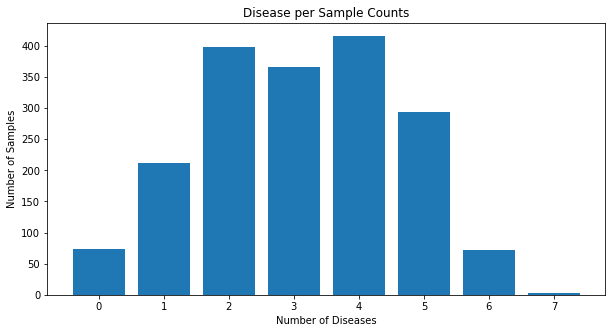

In [88]:
## DISEASE PER SAMPLE COUNTS

multiple_disease_counts = eda_df['total_diseases'].value_counts()

fig, ax = plt.subplots(figsize=(10,5))

ax.set_title('Disease per Sample Counts')
ax.set_ylabel('Number of Samples')
ax.set_xlabel('Number of Diseases')
ax.bar(multiple_disease_counts.index, multiple_disease_counts.values)


<BarContainer object of 7 artists>

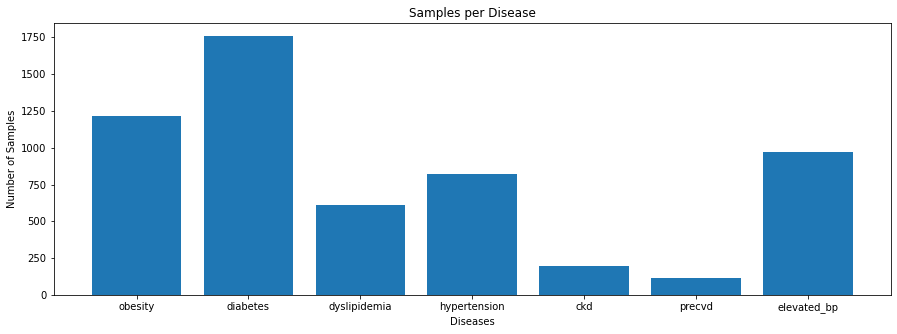

In [89]:
## SIZE OF EACH CLASS (DISEASE)

disease_counts = eda_df.drop(columns='total_diseases').sum(axis=0)

fig, ax = plt.subplots(figsize=(15, 5))

ax.set_title('Samples per Disease')
ax.set_ylabel('Number of Samples')
ax.set_xlabel('Diseases')
ax.bar(disease_counts.index, disease_counts.values)

## Data Preparation

In [90]:
# setting device on GPU if available, else CPU
device = t.device('cuda' if t.cuda.is_available() else 'cpu')
print('Using device:', device)
print()

#Additional Info when using cuda
if device.type == 'cuda':
    print(t.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(t.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(t.cuda.memory_reserved(0)/1024**3,1), 'GB')

Using device: cuda

GeForce GTX 1080 Ti
Memory Usage:
Allocated: 0.0 GB
Cached:    0.0 GB


In [91]:
labels_df = disease_metadata.copy()
labels_df

,obesity,diabetes,dyslipidemia,hypertension,ckd,precvd,elevated_bp
Unnamed: 0,,,,,,,
11666.BLANK7.7B,0,0,0,0,0,0,0
11666.BLANK5.5B,0,0,0,0,0,0,0
11666.G0341A,1,1,0,1,0,0,1
11666.BLANK3.3A,0,0,0,0,0,0,0
11666.BLANK5.5E,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...
11666.G1518B,1,1,0,1,0,0,1
11666.G1501A,0,1,1,1,1,0,1
11666.G1685A,1,1,0,0,0,0,0


In [92]:
labels = t.tensor(labels_df.values)
labels

tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [1, 1, 0,  ..., 0, 0, 1],
        ...,
        [1, 1, 0,  ..., 0, 0, 0],
        [1, 1, 0,  ..., 0, 1, 1],
        [0, 1, 0,  ..., 1, 0, 1]])

In [93]:
feature_matrix = t.tensor(feature_table.values)
feature_matrix

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], dtype=torch.float64)

## Machine Learning Models

### Binary Relevance

In [95]:
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier

In [96]:
labels

tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [1, 1, 0,  ..., 0, 0, 1],
        ...,
        [1, 1, 0,  ..., 0, 0, 0],
        [1, 1, 0,  ..., 0, 1, 1],
        [0, 1, 0,  ..., 1, 0, 1]])

In [97]:
feature_matrix

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], dtype=torch.float64)

In [102]:
def gbc_model():
    loss='exponential'
    learning_rate=0.1 
    n_estimators=150 
    max_depth=3
    random_state=0
    
    clf = GradientBoostingClassifier(loss=loss, 
                                     learning_rate=learning_rate, 
                                     n_estimators=n_estimators, 
                                     max_depth=max_depth, 
                                     random_state=random_state)
    
    return clf

tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [1, 1, 0,  ..., 0, 0, 1],
        ...,
        [1, 1, 0,  ..., 0, 0, 0],
        [1, 1, 0,  ..., 0, 1, 1],
        [0, 1, 0,  ..., 1, 0, 1]])

In [ ]:
# using binary relevance
# initialize binary relevance multi-label classifier
classifier = BinaryRelevance(gbc_model())
# train
classifier.fit(feature_matrix, labels)
# predict


In [ ]:
predictions = classifier.predict(feature_matrix)
# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))

In [167]:
bin_rel_models = {}
X = feature_matrix

clf = gbc_model()

for col in disease_metadata:
    
    clf = init_bin_rel_model() #initalize binary classifier for each disease
    skf = init_skf() #initalize split
    
    X = feature_matrix
    y = t.tensor(disease_metadata[col].values)
    print(y)
    
    
    
#     bin_rel_models[col + ' classifier'] = trained model
    

tensor([0, 0, 1,  ..., 1, 1, 0])
obesity
tensor([0, 0, 1,  ..., 1, 1, 1])
diabetes
tensor([0, 0, 0,  ..., 0, 0, 0])
dyslipidemia
tensor([0, 0, 1,  ..., 0, 1, 1])
hypertension
tensor([0, 0, 0,  ..., 0, 0, 1])
ckd
tensor([0, 0, 0,  ..., 0, 1, 0])
precvd
tensor([0, 0, 1,  ..., 0, 1, 1])
elevated_bp


In [170]:
skf = skf_validator

clf = gbc_model

total_auroc_data = {} # all scores for all cancers, for plotting
total_aupr_data = {}

# loop through all cancer types
for i, cancer in enumerate(disease_types.columns, start=1):
    X = dataset
    y = disease_types[cancer]

    auroc_plt_data = []
    aupr_plt_data = []

    # Loop trough folds
    for train_index, val_index in skf.split(X, y):
        train_X, train_y = X.iloc[train_index], y.iloc[train_index]
        val_X, val_y = X.iloc[val_index], y.iloc[val_index]

        # fit model
        clf.fit(train_X, train_y) 

        # Predict probability of positive class
        preds = clf.predict_proba(val_X)[:,1] 

        # Calculate scores on given fold
        auroc = roc_auc_score(val_y, preds)
        aupr = average_precision_score(val_y, preds)

        auroc_plt_data.append(auroc)
        aupr_plt_data.append(aupr)

    total_auroc_data[cancer] = auroc_plt_data
    total_aupr_data[cancer] = aupr_plt_data

return total_auroc_data, total_aupr_data

tensor([0, 0, 1,  ..., 0, 1, 1])

### Classifier Chain

### Label Powerset

### Adapted Algorithms